In [ ]:
from google.colab import files
uploaded=files.upload()

Saving grades.csv to grades (1).csv


SVM classification report:
              precision    recall  f1-score   support

           C       0.00      0.00      0.00       111
           D       0.00      0.00      0.00       133
           F       0.47      1.00      0.64       219

    accuracy                           0.47       463
   macro avg       0.16      0.33      0.21       463
weighted avg       0.22      0.47      0.30       463


SVM confusion matrix:
[[  0   0 111]
 [  0   0 133]
 [  0   0 219]]



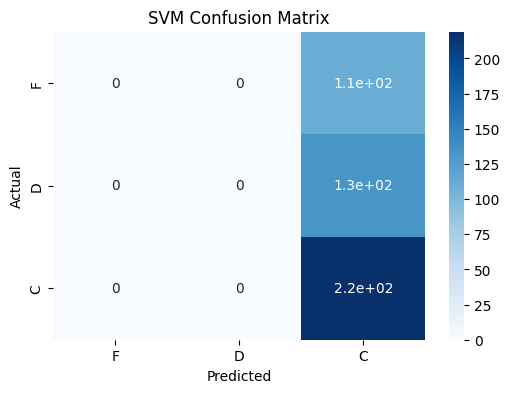

Random Forest classification report:
              precision    recall  f1-score   support

           C       0.20      0.01      0.02       111
           D       0.23      0.02      0.04       133
           F       0.47      0.95      0.63       219

    accuracy                           0.46       463
   macro avg       0.30      0.33      0.23       463
weighted avg       0.34      0.46      0.31       463


Random Forest confusion matrix:
[[  1   2 108]
 [  1   3 129]
 [  3   8 208]]



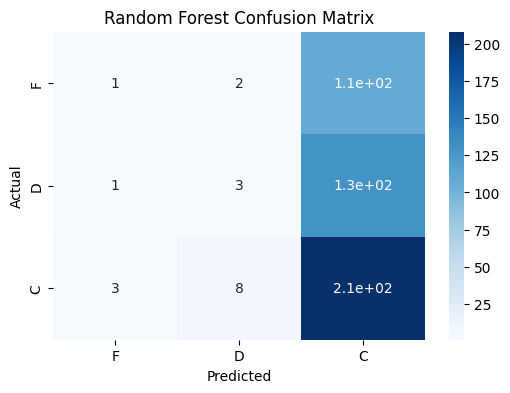

Naive Bayes classification report:
              precision    recall  f1-score   support

           C       0.00      0.00      0.00       111
           D       0.00      0.00      0.00       133
           F       0.47      1.00      0.64       219

    accuracy                           0.47       463
   macro avg       0.16      0.33      0.21       463
weighted avg       0.22      0.47      0.30       463


Naive Bayes confusion matrix:
[[  0   0 111]
 [  0   0 133]
 [  0   0 219]]



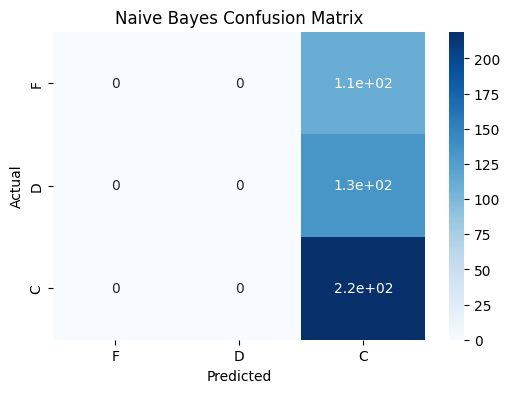

Decision Tree classification report:
              precision    recall  f1-score   support

           C       0.27      0.24      0.25       111
           D       0.31      0.25      0.27       133
           F       0.48      0.56      0.52       219

    accuracy                           0.39       463
   macro avg       0.35      0.35      0.35       463
weighted avg       0.38      0.39      0.38       463


Decision Tree confusion matrix:
[[ 27  24  60]
 [ 28  33  72]
 [ 46  51 122]]



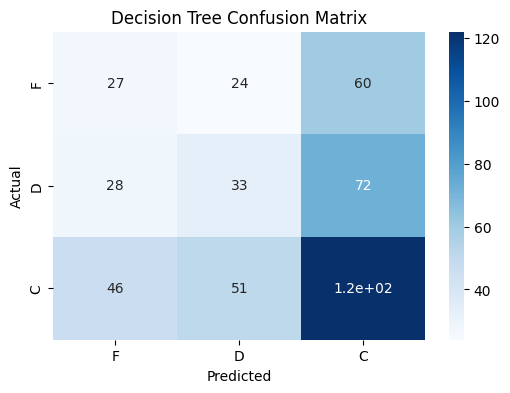

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydot

# Load the data
data = pd.read_csv('grades.csv')

# Preprocessing
# Calculate the average grade across all assignments
data['average_grade'] = data[['assignment1_grade', 'assignment2_grade', 'assignment3_grade',
                              'assignment4_grade', 'assignment5_grade', 'assignment6_grade']].mean(axis=1)
# Bin the average grades into three categories
data['grade_category'] = pd.cut(data['average_grade'], bins=[0, 59, 69, 100], labels=['F', 'D', 'C'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['assignment1_submission', 'assignment2_submission', 
                                                          'assignment3_submission', 'assignment4_submission', 
                                                          'assignment5_submission', 'assignment6_submission']], 
                                                    data['grade_category'], test_size=0.2)

# Vectorize the submission dates using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train.apply(lambda x: ' '.join(x), axis=1))
X_test = vectorizer.transform(X_test.apply(lambda x: ' '.join(x), axis=1))

# Train and evaluate the models
models = {'SVM': SVC(), 'Random Forest': RandomForestClassifier(), 'Naive Bayes': MultinomialNB(), 'Decision Tree': DecisionTreeClassifier()}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Print the classification report and confusion matrix
    print(f'{name} classification report:\n{classification_report(y_test, y_pred)}\n')
    cm = confusion_matrix(y_test, y_pred)
    print(f'{name} confusion matrix:\n{cm}\n')
    
    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['F', 'D', 'C'], yticklabels=['F', 'D', 'C'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} Confusion Matrix')
    plt.show()